> Thanks to [All that you need to know about the Android market](https://www.kaggle.com/lava18/all-that-you-need-to-know-about-the-android-market) and I did some futher extensions.

First, I import some packages.

In [172]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
import os 
import plotly
import plotly.plotly as py
import math
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff


Read data

In [173]:
df = pd.read_csv("../input/googleplaystore.csv")

Than doing data preprocessing

In [174]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [177]:
sum(df.duplicated("App"))

1181

In [178]:
df.drop_duplicates(subset='App', inplace=True)

In [179]:
df.isna().sum()
df.dropna(subset = ["Type" , "Content Rating" , "Current Ver" , "Android Ver"]  , inplace = True)

In [180]:
df.isna().sum()

App                  0
Category             0
Rating            1458
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [181]:
df["Rating"] = df["Rating"].apply(lambda x: np.nan if math.isnan(x) else x)

Fit a normal distribution to impute missing values of rating by different type(free or paid) and category.

In [182]:
for i in np.unique(df["Category"]):
    for l in np.unique(df["Type"]):
        df.loc[(df.Category == i) & (df.Type == l) & (df.Rating.isnull()), "Rating"] = np.random.normal(
            np.mean(df.loc[(df.loc[:,"Category"] == i) & (df.loc[:,"Type"] == l)].loc[:,"Rating"]) , np.std(df.loc[(df.loc[:,"Category"] == i) & (df.loc[:,"Type"] == l)].loc[:,"Rating"]) , 
        size = len(df.loc[(df.Category == i) & (df.Type == l) & (df.Rating.isnull()), "Rating"]))                                                                                           

In [183]:
df["Rating"] = df["Rating"].apply(lambda x: 5 if x>5 else x)
df["Rating"] = df["Rating"].apply(lambda x: 1 if x<1 else x)
df["Rating"]
df.dropna(inplace = True)

In [184]:
df.loc[:,'Installs'] = df.loc[:,'Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df.loc[:,"Installs"]=df.loc[:,"Installs"].apply(lambda x: x.replace(",","") if "," in str(x) else x)
df.loc[:,"Installs"] = df.loc[:,"Installs"].apply(lambda x: int(x))

In [185]:
df.loc[:,'Price'] = df.loc[:,'Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df.loc[:,'Price'] = df.loc[:,'Price'].apply(lambda x: float(x))


In [186]:
df.loc[:,"Reviews"] = df.loc[:,"Reviews"].apply( lambda x : float(x))

In [187]:
df.loc[:,"Size"]
df.loc[:,"Size"] = df.loc[:,"Size"].apply(lambda x : x.replace("M","") if "M" in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df.loc[:,"Size"] = df.loc[:,'Size'].apply( lambda x : float(x) if x != "Varies with device" else x)

In [188]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Analyze

In [189]:
earning={}
for i in np.unique(df["Category"]):
        earning[i] = np.mean(df.loc[(df.Category == i) & (df.Type == "Paid") , "Price"])*np.median(df.loc[(df.Category == i) & (df.Type == "Paid")  , "Installs"]) 


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning:

Mean of empty slice.

/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning:

invalid value encountered in double_scalars



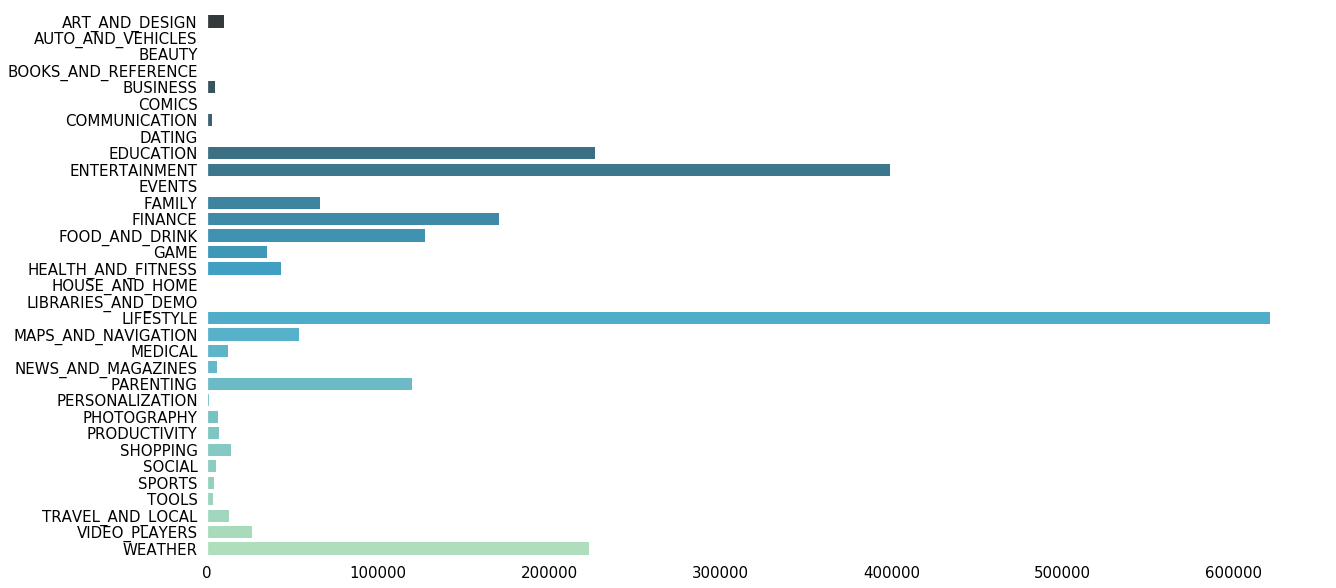

In [190]:
#how much paid app had earned(median)
a = sns.barplot(y = list(earning.keys()) , x = list(earning.values()) ,
                saturation=1 , 
                palette = "GnBu_d", 
               )

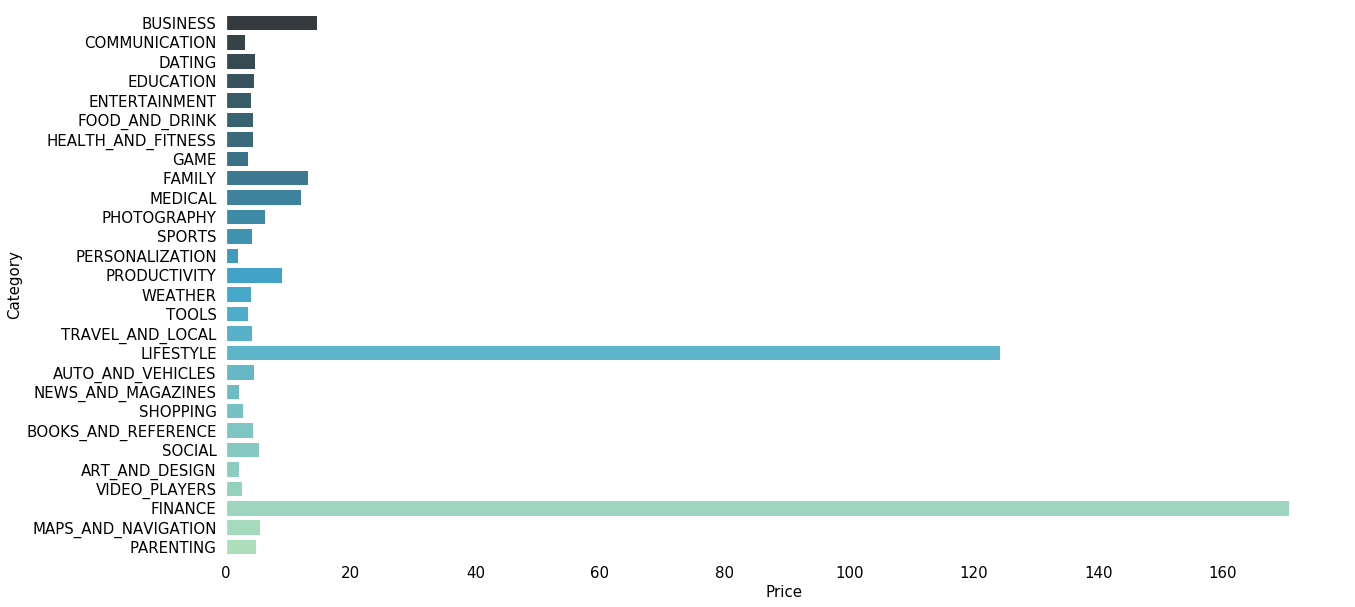

In [191]:
#mean of price of each category 
a = sns.barplot(y = df.loc[(df.Type == "Paid") , "Category"]  ,
                x = df.loc[(df.Type == "Paid") , "Price"] , ci = None ,
                saturation=1 , 
                palette = "GnBu_d", 
               )

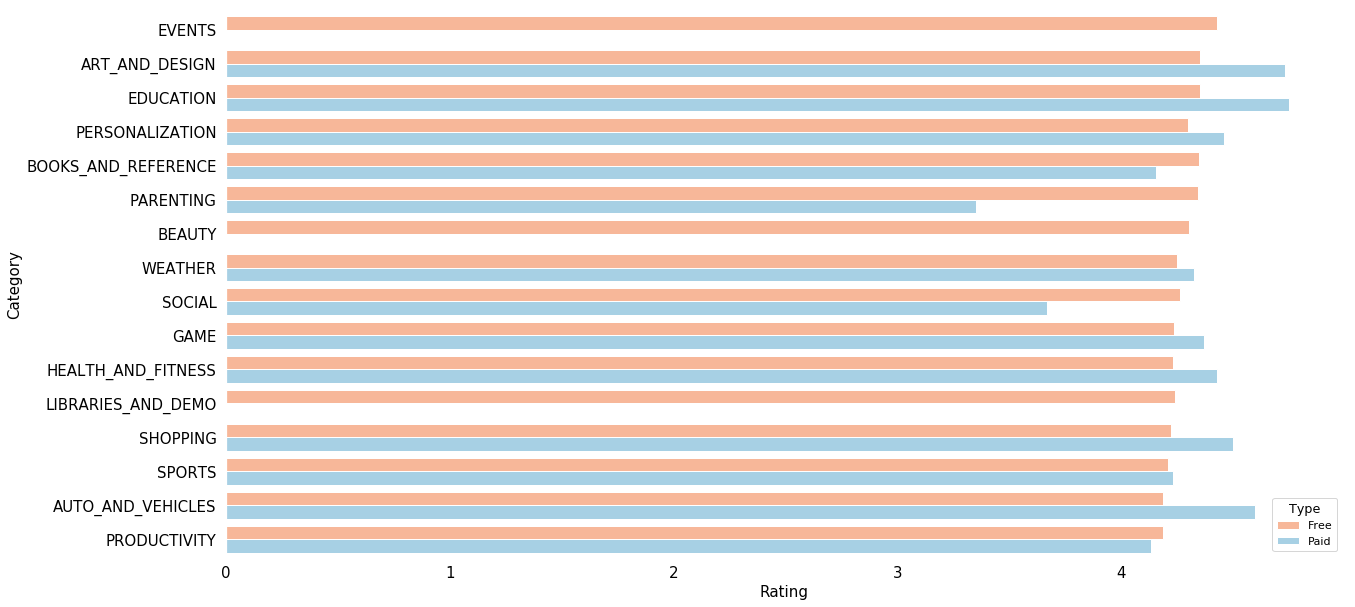

In [192]:
bg_color = 'white'
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':15,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':15,
            'font.size':15,
            'ytick.labelsize':15})
#rating of each category
a = sns.barplot(y = df["Category"] , x = df["Rating"] ,ci=None , 
                saturation=1 , 
                data = df , 
                palette = "RdBu",
                hue = df["Type"] ,
                order = df.groupby("Category").mean().sort_values("Rating" ,
                                                                       ascending = False).index[:16])

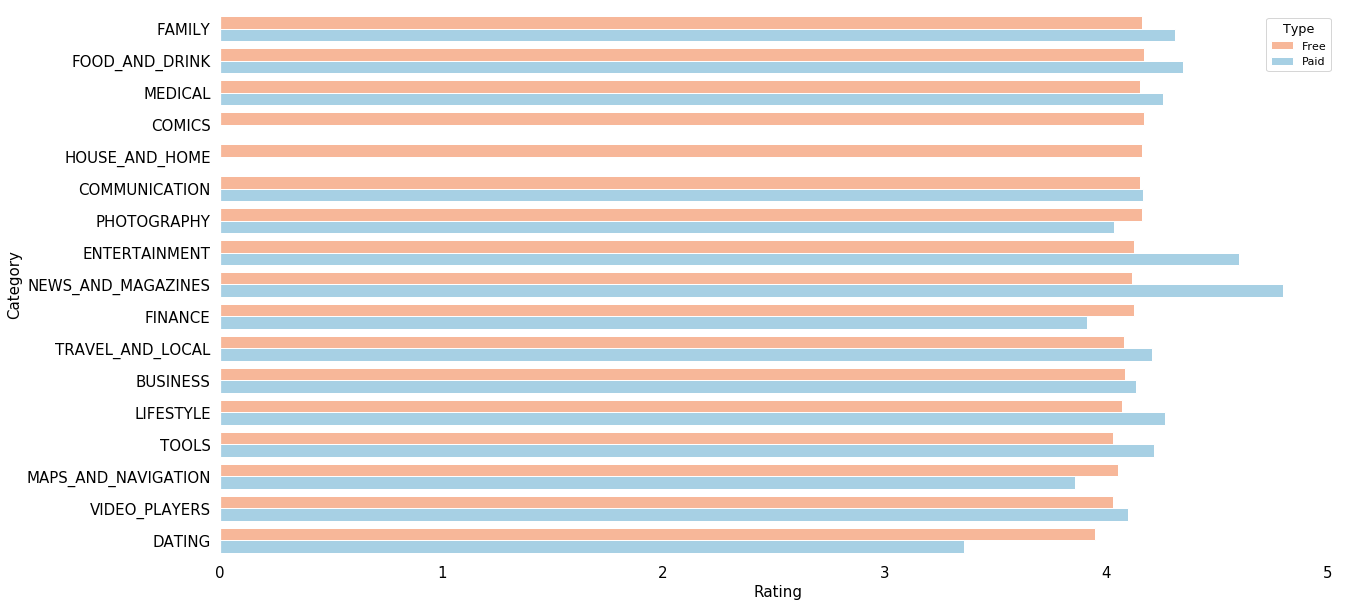

In [193]:
#rating of each category
a = sns.barplot(y = df["Category"] , x = df["Rating"] ,ci=None , 
                saturation=1 , 
                data = df , 
                palette = "RdBu",
                hue = df["Type"] ,
                order = df.groupby("Category").mean().sort_values("Rating" ,
                                                                       ascending = False).index[16:])

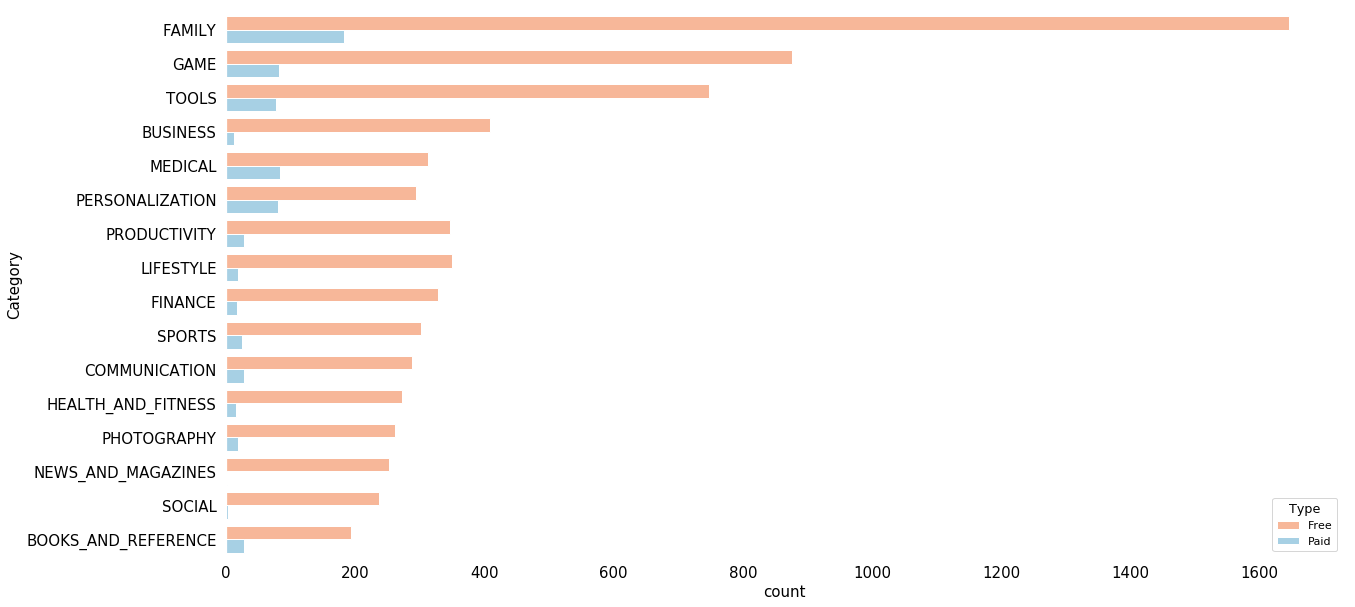

In [194]:
#number of app of each category

p = sns.countplot(data=df,
                  y = 'Category',
                  saturation=1 , 
                  palette = "RdBu",
                  hue = df["Type"] ,
                  order = df['Category'].value_counts().index[:16])




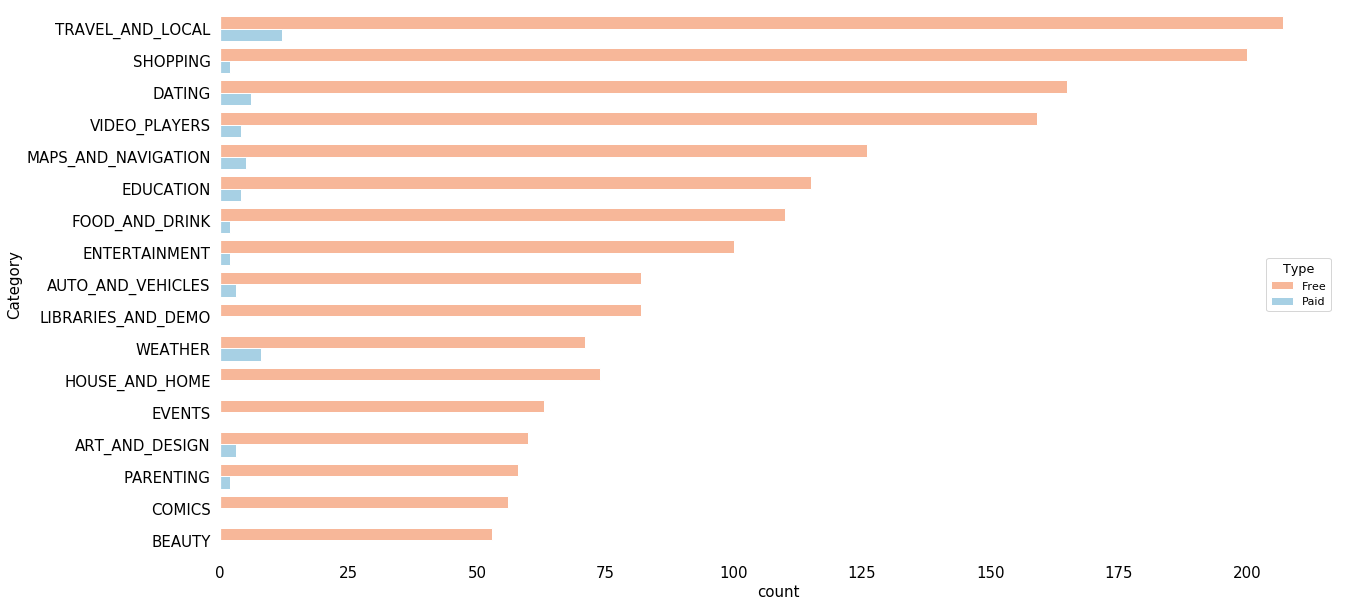

In [195]:
#number of app of each category

p = sns.countplot(data=df,
                  y = 'Category',
                  saturation=1 , 
                  palette = "RdBu",
                  hue = df["Type"] ,
                  order = df['Category'].value_counts().index[16:])



In [196]:
#groups = df_free.groupby('Category').filter(lambda x: len(x) > 258).reset_index()
#array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20))

In [197]:
#groups = df_paid.groupby('Category').filter(lambda x: len(x) > 25).reset_index()
#array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20))

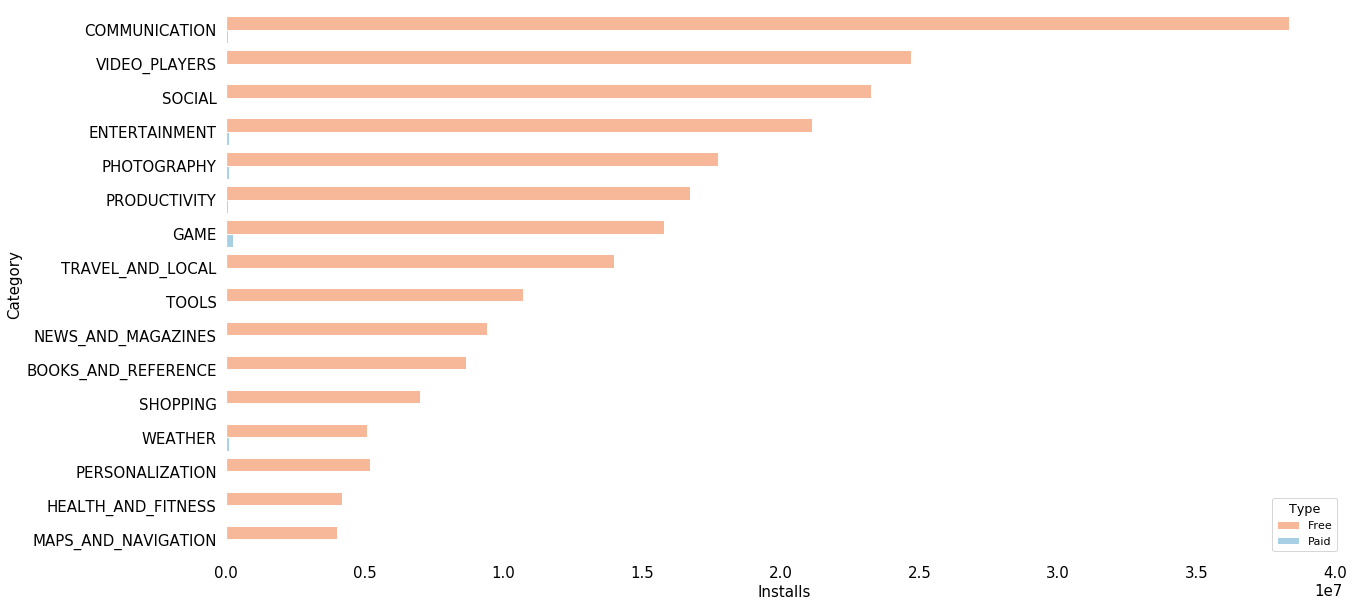

In [198]:
#installs of each category
a = sns.barplot(y = df["Category"] , x = df["Installs"] , ci=None , 
                hue = df["Type"] ,
                saturation=1 , 
                palette = "RdBu",
                data = df , 
                order = df.groupby("Category").mean().sort_values("Installs" ,
                                                                ascending = False).index[:16])

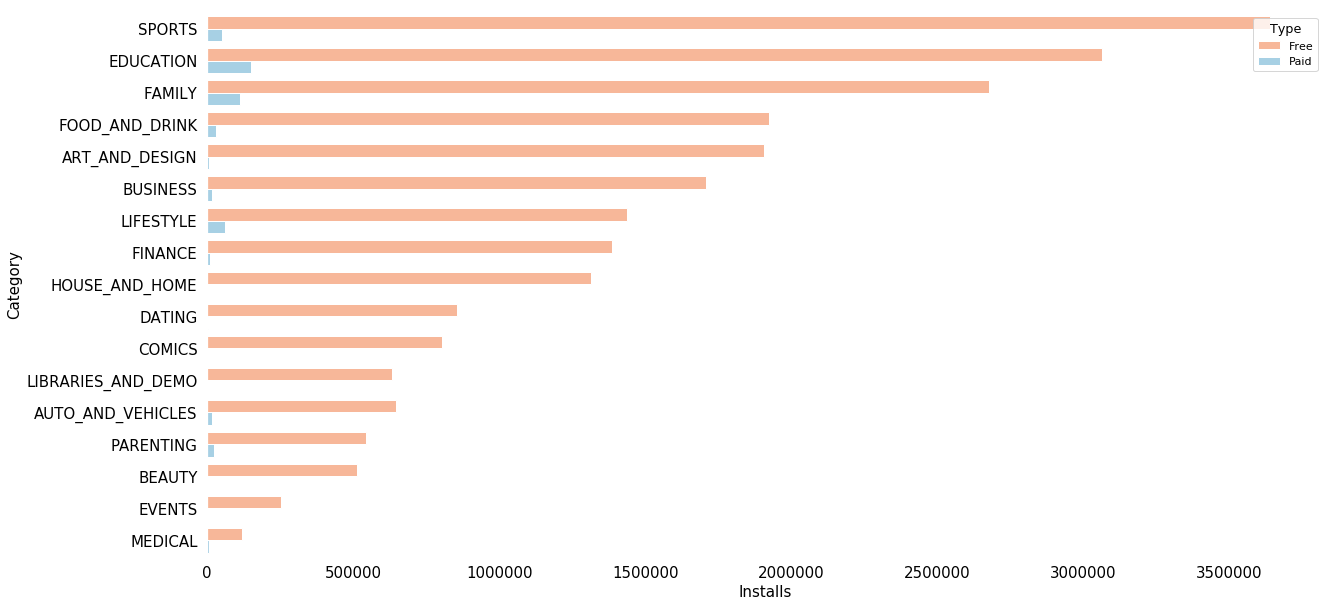

In [199]:
#installs of each category
a = sns.barplot(y = df["Category"] , x = df["Installs"] , ci=None , 
                hue = df["Type"] ,
                saturation=1 , 
                palette = "RdBu",
                data = df , 
                order = df.groupby("Category").mean().sort_values("Installs" ,
                                                                ascending = False).index[16:])

In [200]:
earning={}
for i in np.unique(df["Content Rating"]):
        earning[i] = np.mean(df.loc[(df["Content Rating"] == i) & (df.Type == "Paid") , "Price"])*np.mean(df.loc[(df["Content Rating"] == i) & (df.Type == "Paid")  , "Installs"]) 
earning

{'Adults only 18+': nan,
 'Everyone': 588835.0130073315,
 'Everyone 10+': 2108510.561914672,
 'Mature 17+': 3568690.562962962,
 'Teen': 1355987.581508876,
 'Unrated': nan}

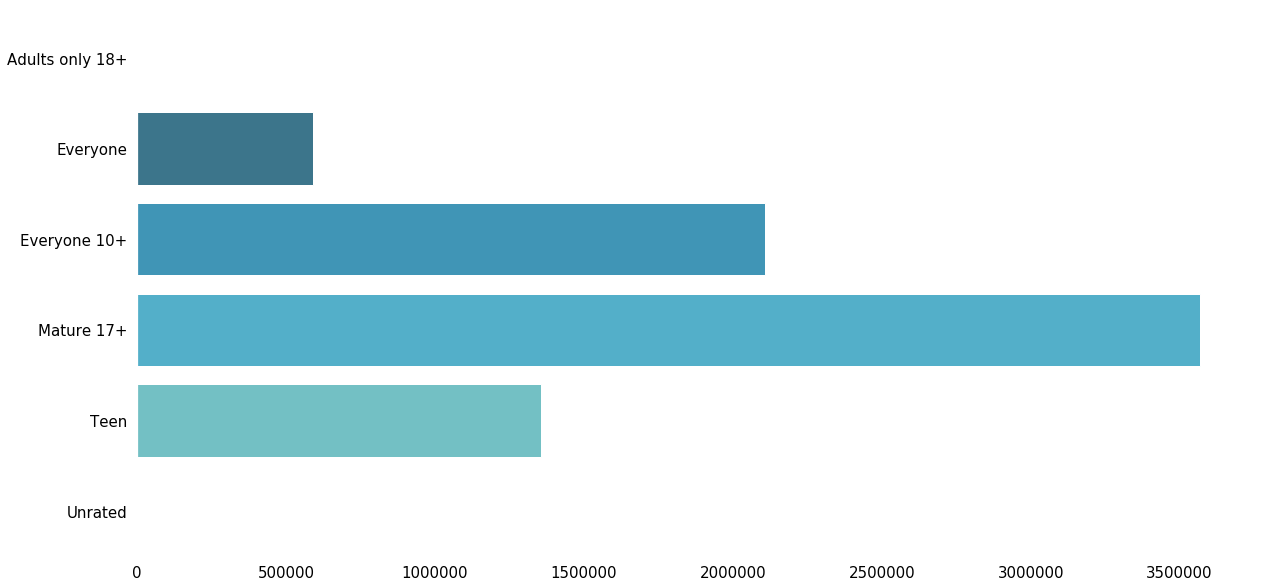

In [201]:
#how much paid app had earned(mean)
a = sns.barplot(y = list(earning.keys()) , x = list(earning.values()) ,
                saturation=1 , 
                palette = "GnBu_d", 
               )

In [202]:
earning={}
for i in np.unique(df["Content Rating"]):
        earning[i] = np.mean(df.loc[(df["Content Rating"] == i) & (df.Type == "Paid") , "Price"])*np.median(df.loc[(df["Content Rating"] == i) & (df.Type == "Paid")  , "Installs"]) 
earning

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning:

Mean of empty slice.

/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning:

invalid value encountered in double_scalars



{'Adults only 18+': nan,
 'Everyone': 14777.81538461524,
 'Everyone 10+': 45064.51612903225,
 'Mature 17+': 17019.999999999996,
 'Teen': 126207.69230769234,
 'Unrated': nan}

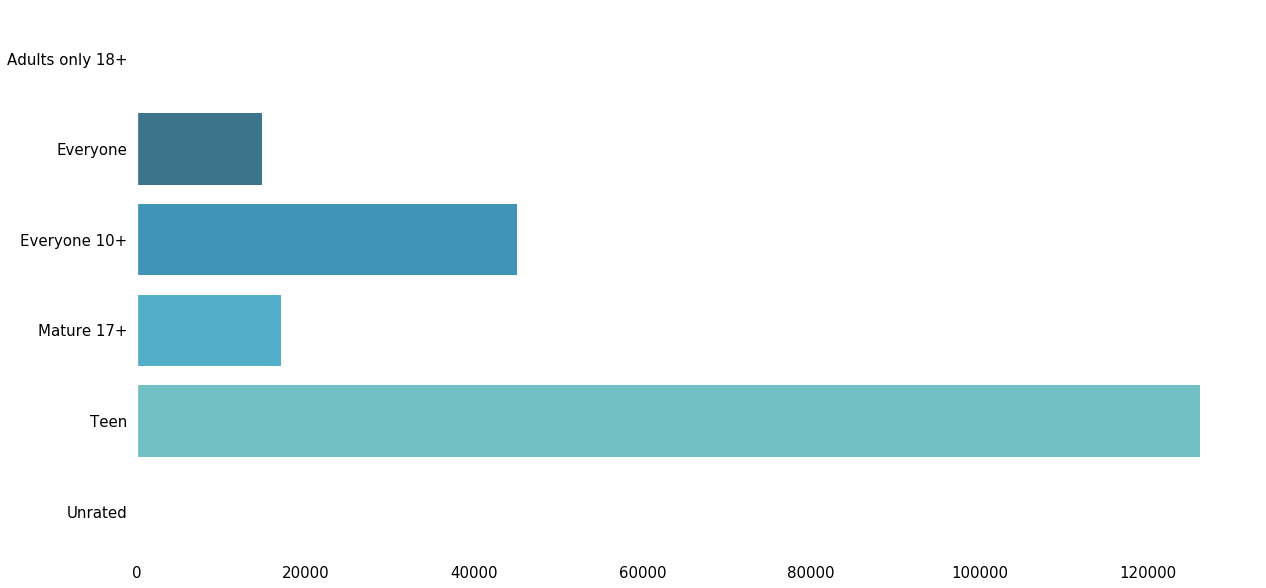

In [203]:
#how much paid app had earned(median)
a = sns.barplot(y = list(earning.keys()) , x = list(earning.values()) ,
                saturation=1 , 
                palette = "GnBu_d", 
               )

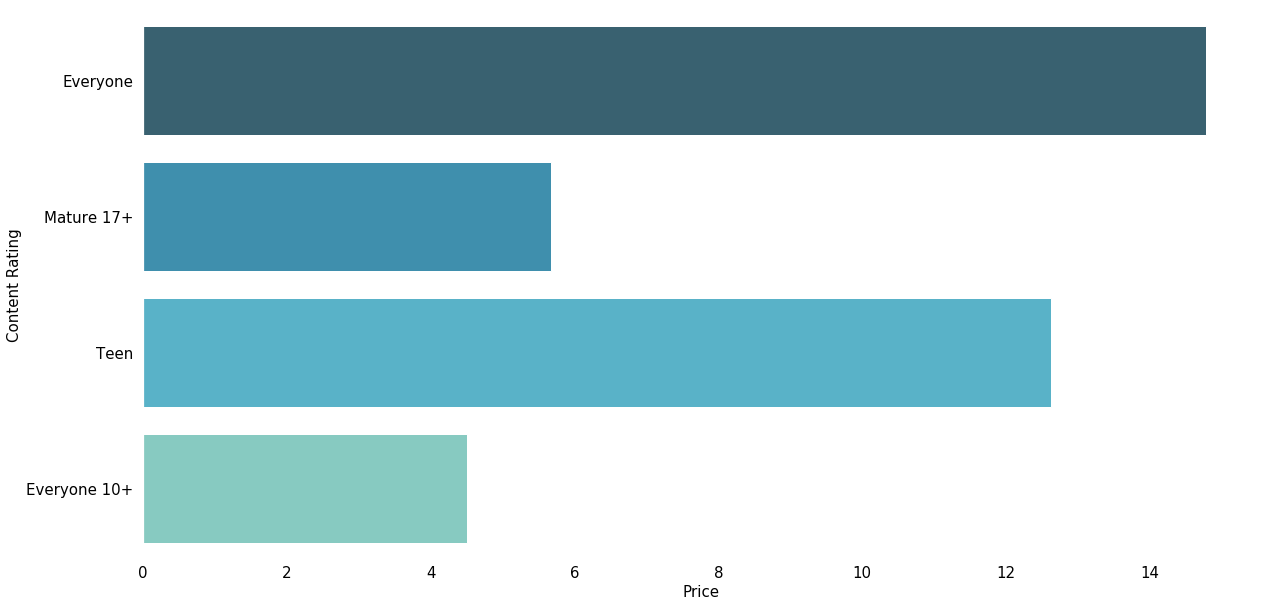

In [204]:
#mean of price of each category 
a = sns.barplot(y = df.loc[(df.Type == "Paid") , "Content Rating"]  ,
                x = df.loc[(df.Type == "Paid") , "Price"] , ci = None ,
                saturation=1 , 
                palette = "GnBu_d", 
               )

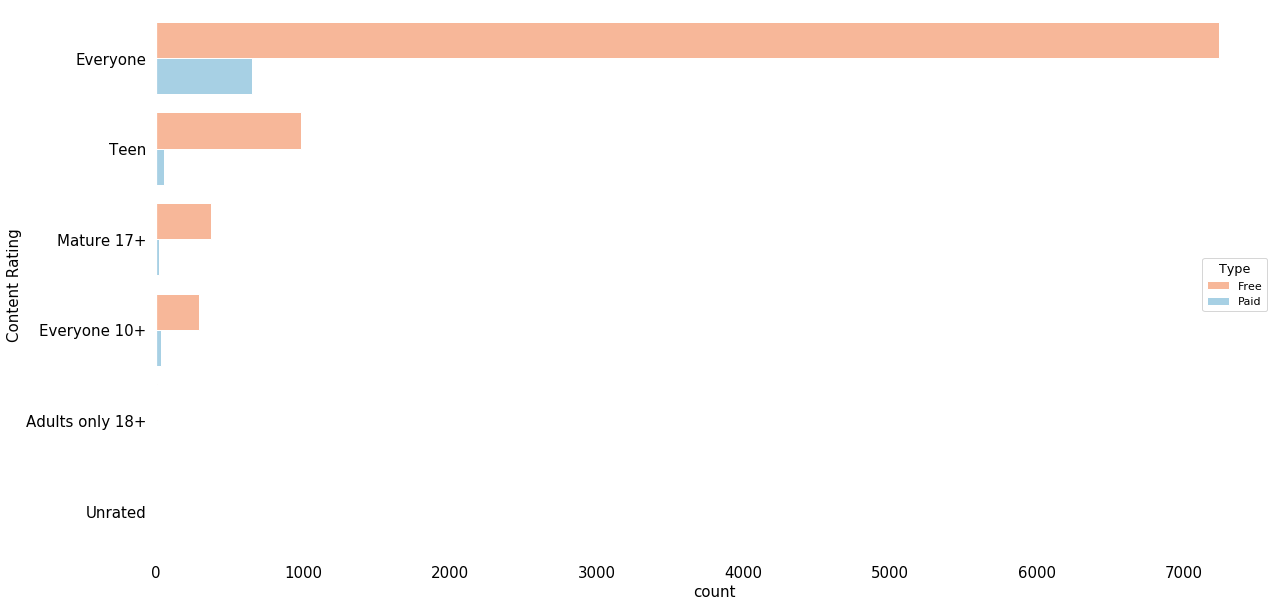

In [205]:
#numbers of app of each content rating
a = sns.countplot(y = df["Content Rating"] ,
                data = df , 
                hue = df["Type"] ,
                saturation=1 , 
                palette = "RdBu",
                order = df["Content Rating"].value_counts().index)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



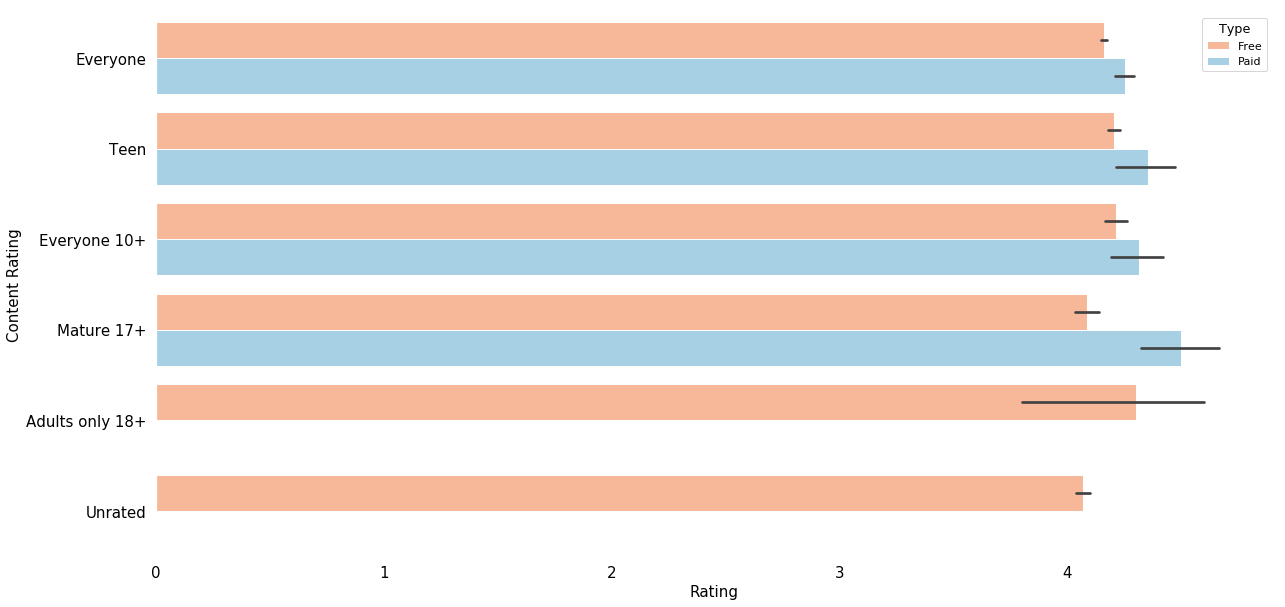

In [206]:
#rating of each content rating
a = sns.barplot(y = df["Content Rating"], x = df["Rating"] ,
                saturation=1 , 
                hue = df["Type"] ,
                palette = "RdBu",
                data = df)

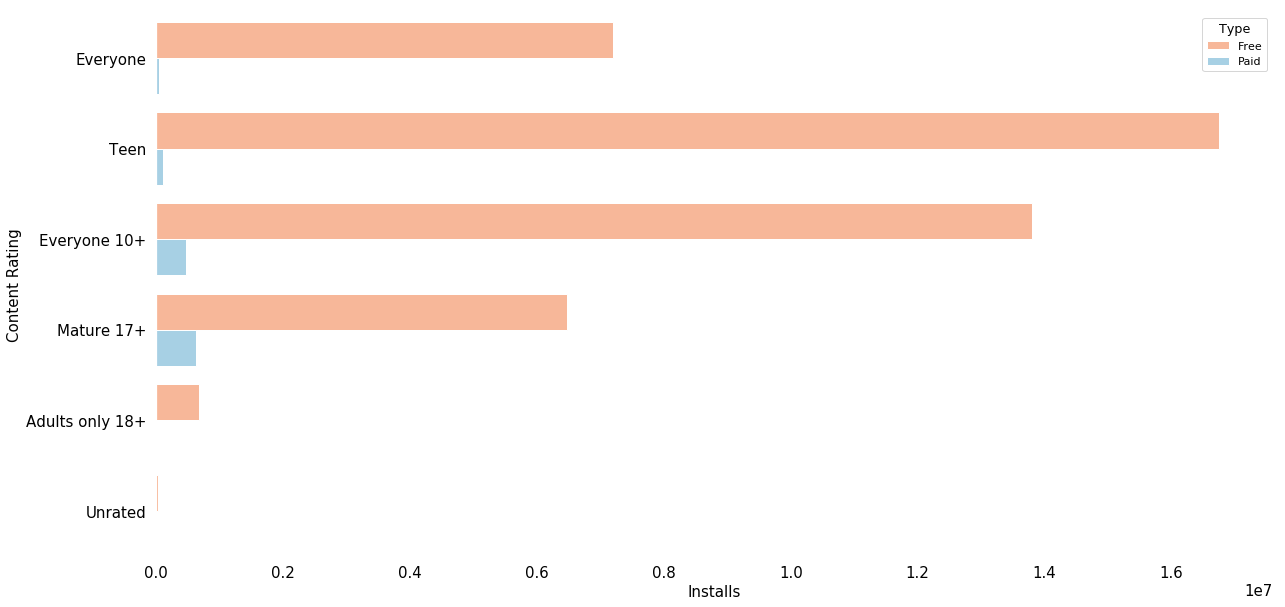

In [207]:
#installs of each content rating
a = sns.barplot(y = df["Content Rating"], x = df["Installs"] ,
                saturation=1 , 
                hue = df["Type"] ,
                palette = "RdBu",
                data = df, ci=None)

In [208]:
#pie chart of free app
number_of_apps_in_category_free = df.loc[df['Type']=="Free"]["Category"].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category_free.index,
        values = number_of_apps_in_category_free.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='active_category')

In [209]:
#pie chart of paid app
number_of_apps_in_category_paid = df.loc[df['Type']=="Paid"]["Category"].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category_paid.index,
        values = number_of_apps_in_category_paid.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='active_category')

In [210]:
#overall rating distribution of paid apps
data = [go.Histogram(
        x = df.loc[df['Type']=="Paid"].Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(df.loc[df['Type']=="Paid"].Rating))
plotly.offline.iplot(data, filename='overall_rating_distribution')

Average app rating =  4.269649079105194


In [211]:
#overall rating distribution of free apps
data = [go.Histogram(
        x = df.loc[df['Type']=="Free"].Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(df.loc[df['Type']=="Free"].Rating))
plotly.offline.iplot(data, filename='overall_rating_distribution')

Average app rating =  4.165281706854494


In [212]:
df["Size"] = df["Size"].apply(lambda x : float(x) if x != "Varies with device" else False)

In [213]:
df = df.loc[df["Size"] != False].dropna()


In [214]:
df["size"] = pd.qcut(df["Size"] , 4)

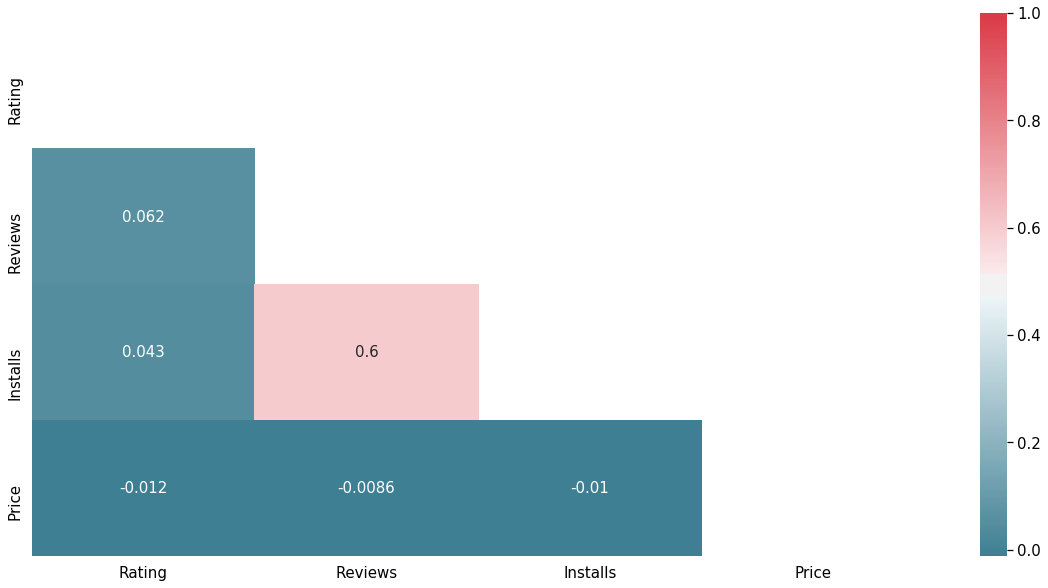

In [215]:
#heat map
df_cor = df.loc[:,["Rating","Reviews","Installs","Price","Size"]]
df_cor = (df_cor - np.mean(df_cor))/np.std(df_cor)
cor = df_cor.corr()
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cor , cmap = cmap , mask = mask , annot = True)

In [216]:
earning={}

for i in np.unique(df["size"]):
        
        earning[i] = np.mean(df.loc[(df["size"] == i) & (df.Type == "Paid") , "Price"])*np.mean(df.loc[(df["size"] == i) & (df.Type == "Paid")  , "Installs"]) 
earning

{Interval(0.007500000000000001, 4.6, closed='right'): 270937.2384137165,
 Interval(4.6, 12.0, closed='right'): 596937.3347102049,
 Interval(12.0, 28.0, closed='right'): 660990.3056389424,
 Interval(28.0, 100.0, closed='right'): 1512010.5247822623}

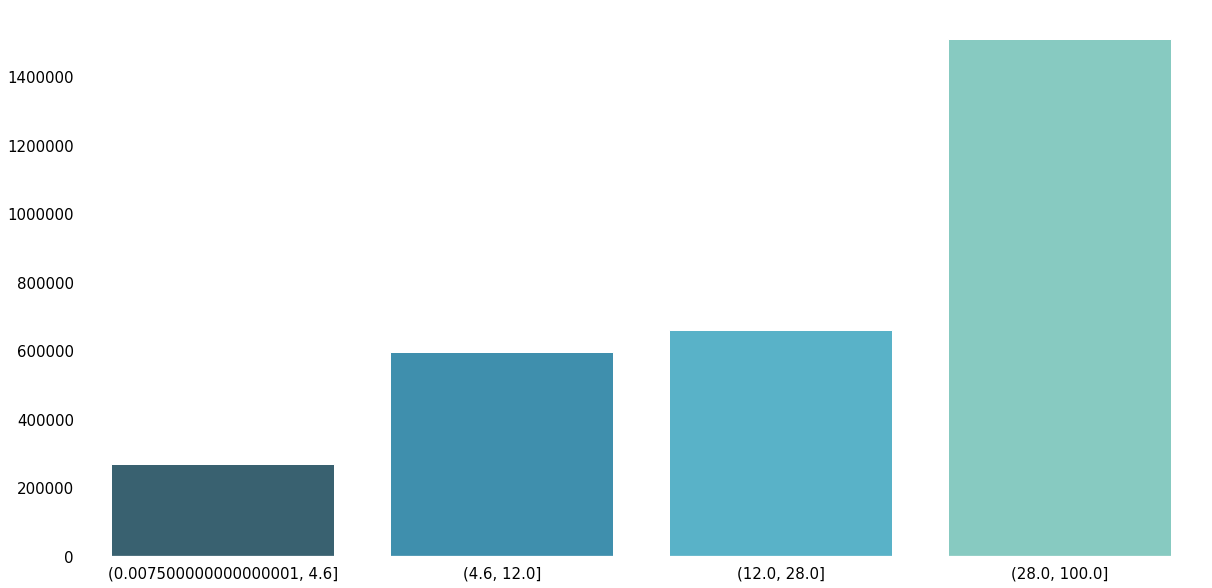

In [217]:
#how much paid app had earned(mean)
a = sns.barplot(x = list(earning.keys()) , y = list(earning.values()) ,
                saturation=1 , 
                palette = "GnBu_d", 
               )

In [218]:
earning={}
for i in np.unique(df["size"]):
        earning[i] = np.mean(df.loc[(df["size"] == i) & (df.Type == "Paid") , "Price"])*np.median(df.loc[(df["size"] == i) & (df.Type == "Paid")  , "Installs"]) 
earning

{Interval(0.007500000000000001, 4.6, closed='right'): 19259.12133891201,
 Interval(4.6, 12.0, closed='right'): 17786.029411764623,
 Interval(12.0, 28.0, closed='right'): 11725.107913669071,
 Interval(28.0, 100.0, closed='right'): 47329.2168674699}

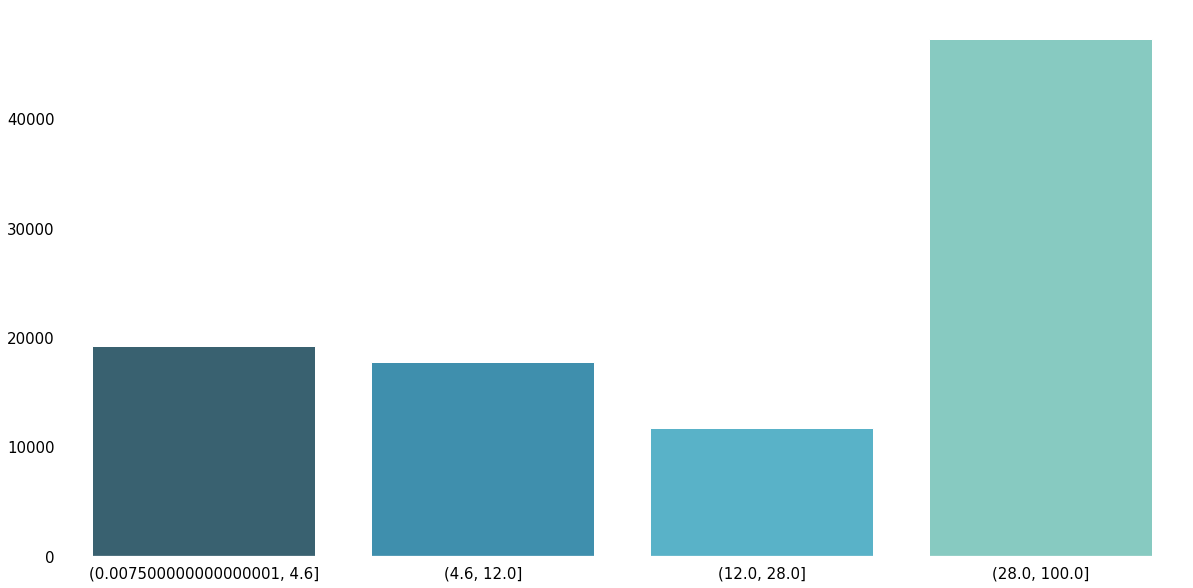

In [219]:
#how much paid app had earned(median)
a = sns.barplot(x = list(earning.keys()) , y = list(earning.values()) ,
                saturation=1 , 
                palette = "GnBu_d", 
               )

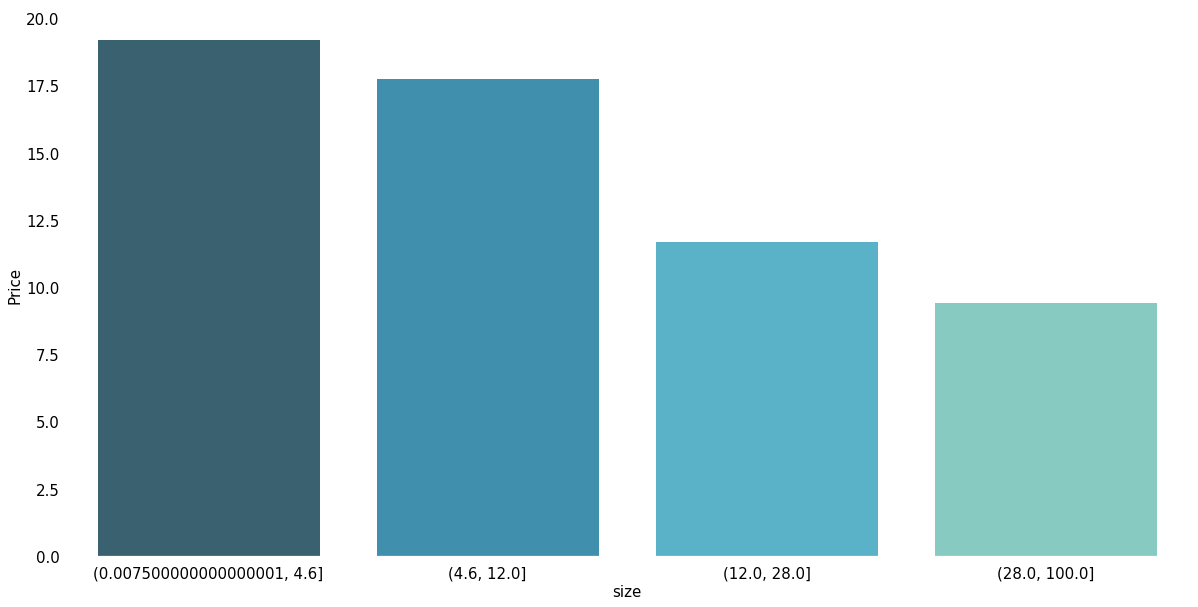

In [220]:
#mean of price of each category 
a = sns.barplot(x = df.loc[(df.Type == "Paid") , "size"]   ,
                y = df.loc[(df.Type == "Paid") , "Price"] , ci = None ,
                saturation=1 , 
                palette = "GnBu_d", 
                data = df
               )

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Interval(0.007500000000000001, 4.6, closed='right')
 Interval(4.6, 12.0, closed='right') Interval(12.0, 28.0, closed='right')
 Interval(28.0, 100.0, closed='right')]


([<matplotlib.axis.YTick at 0x7fe45e26ef98>,
 <a list of 4 Text yticklabel objects>)

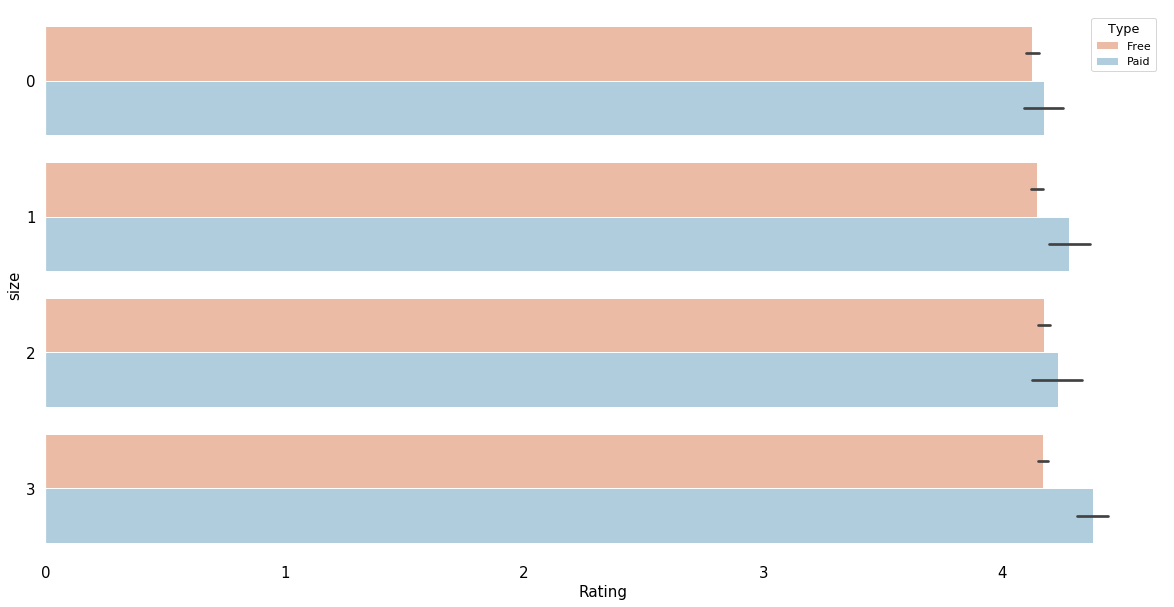

In [221]:
# rating of apps with different size 
a = sns.barplot(y = df["size"] , x = df["Rating"],
                hue = df["Type"] ,
                palette = "RdBu",
                data = df )
print(np.unique(df["size"]))
plt.yticks([0,1,2,3],["0","1","2","3"])


([<matplotlib.axis.YTick at 0x7fe45dee9be0>,
 <a list of 4 Text yticklabel objects>)

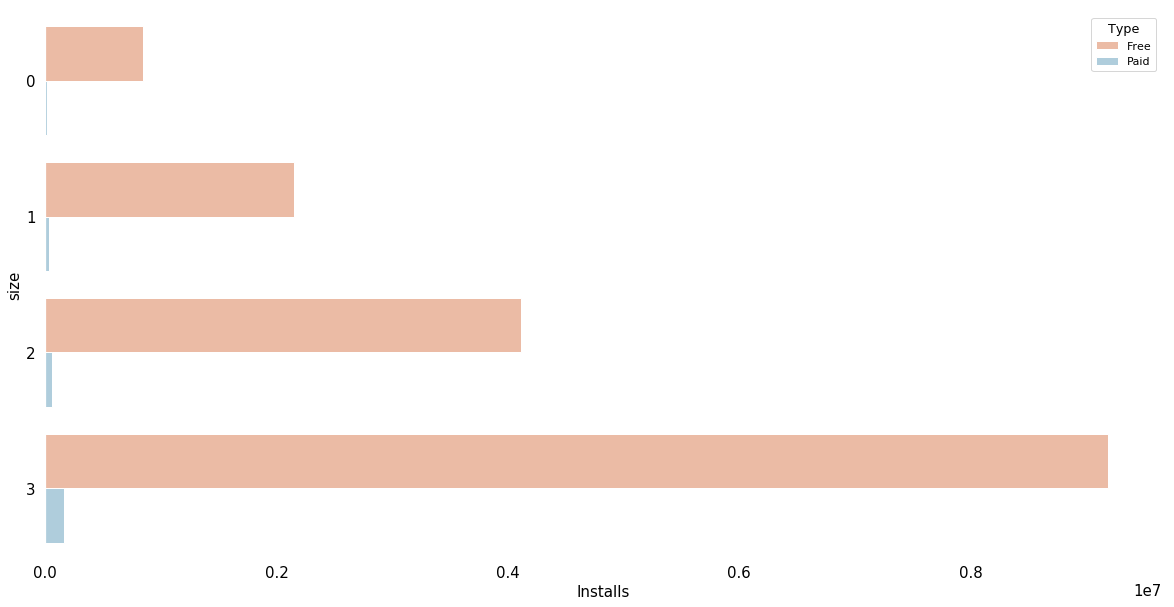

In [222]:
# installs of apps with different size 
a = sns.barplot(y = df["size"] , x = df["Installs"],ci = None ,
                hue = df["Type"] ,
                palette = "RdBu",
                data = df )
plt.yticks([0,1,2,3],["0","1","2","3"])